# DS 3000 - Assignment 10

**Student Name**: Daniel Mccue

**Date**: 11/6/24


## Question 1: 

load the data directly from the URL into a DataFrame.

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('babies(1).csv')

df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


## Question 2: 
10 pts) Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:
    * Perform EDA using the dataset to demonstrate patterns.
    * Handle any missing data and invalid data. Justify your approach.
    * Plot a histogram of the birth weight and explain the overall distribution. 
    

In [332]:

missing_counts = df.isna().sum()



print(missing_counts)




case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64


In [333]:

#Replace NAs with median
df.fillna({
    'weight': df.weight.median(),
    'height': df.height.median(),
    'gestation': df.gestation.median(),
    'age': df.age.median()
}, inplace=True)

#Assume no smoke for those missing vals
df.fillna({'smoke': 0}, inplace=True)


newMissing = df.isna().sum()
print(newMissing)


case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64


I cleaned the data by replacing all numerical nulls with the median value for that data column, then for the categorical variable of smoke I assume all nulls did not smoke. These choices allow for a complete data set, with relatively little inaccuracy.

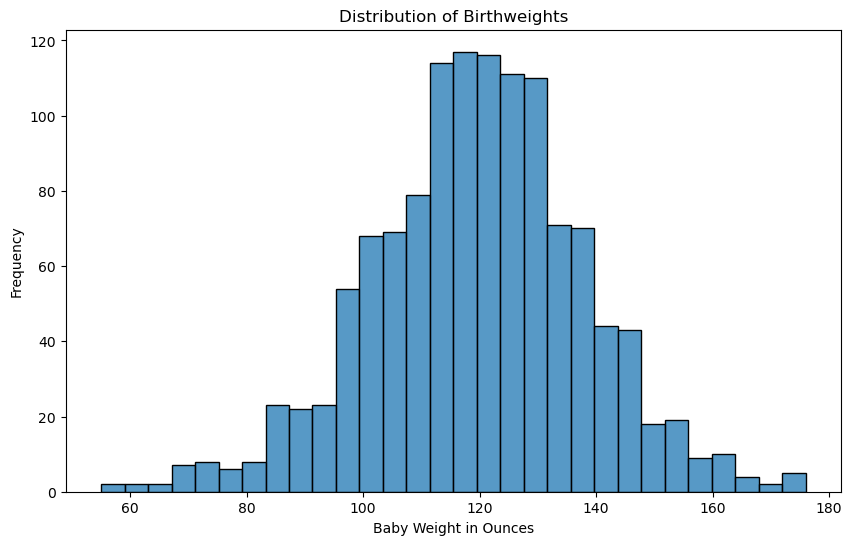

In [334]:
#Histogram of bwt
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='bwt')
plt.title('Distribution of Birthweights')
plt.ylabel('Frequency')
plt.xlabel('Baby Weight in Ounces')
plt.show()

The graph of birthweights shows a clear normal distribution, with the average baby weight appearing to be about 115-120 ounces. There is quite a large range of weights in addition, with the lightest baby weighing just under 60 ounces, and the heaviest in the dataset approaching 180ounces.

## Question 3:
(5 pts) Feature Selection
Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected. Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
    * Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
    * Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.


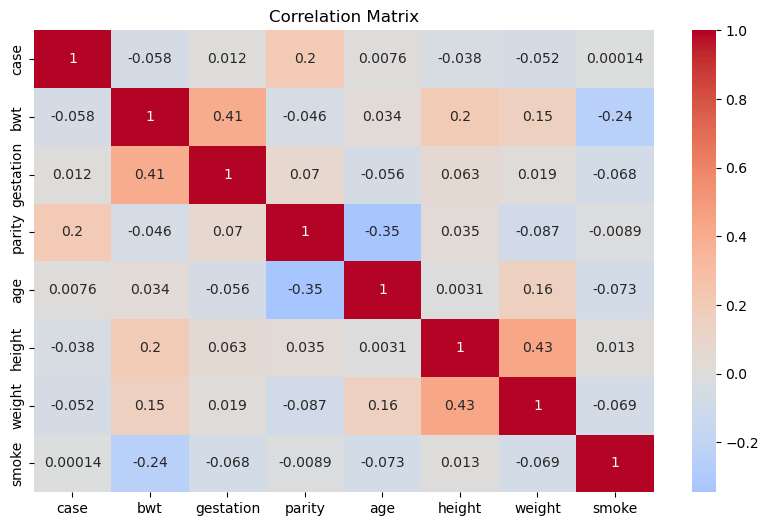

Smoke vs bwt stats:

T-test results:
t-statistic: -8.7083
p-value: 0.0000


In [335]:
# Calculate correlations with birth weight
correlations = df.corr()['bwt'].sort_values(ascending=False)

# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#statistical tests for smoke and bwt
smokers_bwt = df[df['smoke'] == 1]['bwt']
non_smokers_bwt = df[df['smoke'] == 0]['bwt']
t_stat, p_value = stats.ttest_ind(smokers_bwt, non_smokers_bwt)
print('Smoke vs bwt stats:')
print(f"\nT-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")



I created a heatmap to compare different correlations, hence showing which variables have the most similarities. I will list below the pros and cons, and the effectiveness each feature in predictions. I have also printed important statistical testing on smoke and bwt, which shows an extremely strong correlation.


Gestation:
Strongest positive correlation with birth weight, 
longer gestation typically results in higher birth weight, 
primary predictor

Weight (Mother's):
Pretty strong positive correlation,  
Maternal weight influences baby development, 
decent predictor

Height (Mother's):
Pretty strong correlation expected, 
mother height effects baby weight, 
decent predictor

Smoke:
Shows large negative impact on birth weight, 
Binary categorical variable, 
Important health indicator, 
decent predictor

Age:
May have non-linear relationship with birth weight, 
ICould capture maternal health aspects

Parity:
Previous pregnancies can influence birth weight, 
not too good as predictor

Other Features:
Case: Just an ID number, no predictive value, 
BWT: This is our target variable (Tip #2)

## Question 4:
Data Partitioning
(2 pts) Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.


In [336]:
#Typical random state value, reproducability
RANDOM_STATE = 42

#Separate features and target
X = df.drop(['bwt', 'case'], axis=1)  #target and ID column
y = df.bwt

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE
)

#Encode categorical variable (smoke)
le = LabelEncoder()
X_train.loc[:, 'smoke'] = le.fit_transform(X_train['smoke'])
X_test.loc[:, 'smoke'] = le.transform(X_test['smoke'])

## Question 5:
(5 pts) Using the Random Forest algorithm, build a machine learning model that predicts the birth weight. 
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [337]:

# Random Forest REGRESSOR since we predicting birth weight -> a continuous value

#Initialize regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Train
rf_model.fit(X_train, y_train)

#predict
y_pred = rf_model.predict(X_test)


## Question 6:
(5 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.


Model Eval Metrics:
Root Mean Square Error (RMSE): 17.46
Mean Absolute Error (MAE): 13.93
R-squared: 0.23


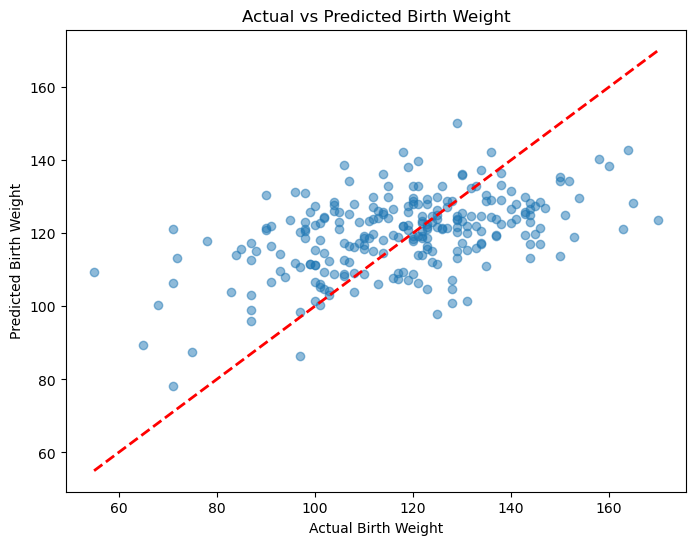

In [338]:
#Calculate various regression variables
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Round to 2 dec place
print("Model Eval Metrics:")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Birth Weight')
plt.ylabel('Predicted Birth Weight')
plt.title('Actual vs Predicted Birth Weight')
plt.show()

The model for predicting birth weights shows moderate performance with an RMSE of 17.46 and MAE of 13.93, indicating average prediction errors of about 17.46 and 13.93 units. The R-squared value of 0.23 suggests that the model explains only 23% of the variance in birth weights, and the scatter plot shows considerable dispersion around the prediction line, indicating that while there is a slight positive correlation between predicted and actual values, the model's predictive power is relatively limited.

## Question 7:
Model Tuning
(5 pts) What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight?
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.
Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation**Links to an external site. to learn more about this algorithm and its parameters. Try at least five different values for the n_estimators parameter to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
Indicate which model performed the best.


In [339]:
# Try diff numbers of trees or n_estimators
n_estimators_list = [50, 100, 200, 500, 1000]
results = []

for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'n_estimators': n,
        'rmse': rmse,
        'r2': r2
    })

# Convert results to df
results_df = pd.DataFrame(results)
print("Model Performance with Different n_estimators:")
print(results_df.round(2))

Model Performance with Different n_estimators:
   n_estimators   rmse    r2
0            50  17.60  0.21
1           100  17.46  0.23
2           200  17.51  0.22
3           500  17.53  0.22
4          1000  17.50  0.22


After testing different numbers of estimators, the model with 100 estimators performed slightly better with an RMSE of 17.46 and R-squared of 0.23. However, the differences in performance across different n_estimators were minimal, with RMSE values ranging from 17.46 to 17.60 and R values between 0.21 and 0.23. The minimal variation in performance metrics across different n_estimators suggests that increasing the number of trees beyond 100 does not significantly improve the model's predictive capability. This indicates that the model's limitations likely stem from other factors, such as the factor features or the natural complexity of birth weight prediction, rather than the number of trees in the random forest

## Question 8:
(15 pts) Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 5 different values of k. Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best.

In [340]:

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try diff k values
k_values = [3, 5, 7, 9, 11]
knn_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    

    y_pred = knn.predict(X_test_scaled)
    

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    knn_results.append({
        'k': k,
        'rmse': rmse,
        'r2': r2
    })

#convert to df 
knn_results_df = pd.DataFrame(knn_results)
print("\nk-NN Model Performance with Different k values:")
print(knn_results_df.round(2))


k-NN Model Performance with Different k values:
    k   rmse    r2
0   3  19.24  0.06
1   5  18.45  0.14
2   7  17.81  0.20
3   9  17.46  0.23
4  11  17.28  0.24


The model performance improved consistently as k increased, with k=11 achieving the best results (RMSE=17.28, r2=0.24). This suggests that using more neighbors helps lower variability and inaccuracy in the predictions. The decreasing RMSE values indicate better accuracy, while the increasing R-squared values show improved explanation of variance in the target variable. The improvement in performance from k=3 to k=11 demonstrates that using more neighbors provides better predictions for this birth weight dataset, though the model's overall predictive power remains less than ideal.

## Question 9:
(3 pts) Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

In [341]:
# best models from both approaches
best_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # use 100, the best
best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)

best_knn = KNeighborsRegressor(n_neighbors=11)  #11 neighbors was best
best_knn.fit(X_train_scaled, y_train)
knn_pred = best_knn.predict(X_test_scaled)

# Compare
print("\nModel Comparison:")
print("Random Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")
print(f"R²: {r2_score(y_test, rf_pred):.2f}")

print("\nk-NN:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, knn_pred)):.2f}")
print(f"R²: {r2_score(y_test, knn_pred):.2f}")


Model Comparison:
Random Forest:
RMSE: 17.46
R²: 0.23

k-NN:
RMSE: 17.28
R²: 0.24


The k-NN model with k=11 slightly outperforms the Random Forest model (n_estimators=100) for birthweight prediction, with a lower RMSE (17.28 vs 17.46) and higher r2 (0.24 vs 0.23). The k-NN model is more suitable as its better accuracy and simpler approach of making predictions based on similar cases in the training data, though both models show relatively modest predictive power overall, with niethere being extremely accurate.

## Question 10:
(+5 bonus points) The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.


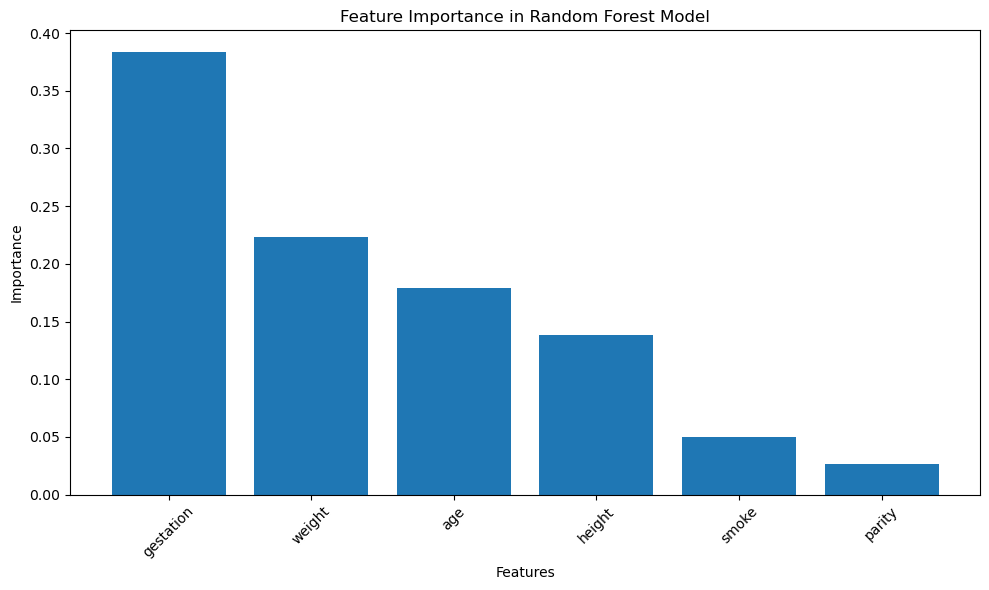


Feature Importance Ranking:
     feature  importance
0  gestation        0.38
4     weight        0.22
2        age        0.18
3     height        0.14
5      smoke        0.05
1     parity        0.03


In [342]:
# Get feature importance from best Random Forest model
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})

# Sorted importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance.round(2))

The printed stats aswell as the bar chart clearly depict that gestation period seems to be the most vital indicator of baby birth weight, while the amount of past pregnancies seems to be the least effective in predicting.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.




- Some stack overflow suggestions on feat importance and how the diff models work, aswell as when to use each. Mainly just explanation of random forest stuff.
